## Demonstration of optimization of GTM hyperparameters with k3nerror
# Hiromasa Kaneko

In [1]:
#settings
import numpy as np
candidatesofshapeofmap = np.arange( 30, 31, dtype=int)
candidatesofshapeofrbfcenters = np.arange( 2, 22, 2, dtype=int)
candidatesofvarianceofrbfs = 2**np.arange( -5, 4, 2, dtype=float)
candidatesoflambdainemalgorithm = 2**np.arange( -4, 0, dtype=float)
candidatesoflambdainemalgorithm = np.append( 0, candidatesoflambdainemalgorithm)
numberofiterations = 200
desplayflag = 0
k = 10

In [2]:
from sklearn.datasets import load_iris
from gtm import gtm
import matplotlib.pyplot as plt
import matplotlib.figure as figure
from k3nerror import k3nerror

In [3]:
# load an iris dataset
iris = load_iris()
#inputdataset = pd.DataFrame(iris.data, columns=iris.feature_names)
inputdataset = iris.data
color = iris.target

In [4]:
# autoscaling
inputdataset = (inputdataset - inputdataset.mean(axis=0)) / inputdataset.std(axis=0,ddof=1)

In [5]:
# grid search
gridparametersandk3nerror = []
allcalcnumber = len(candidatesofshapeofmap)*len(candidatesofshapeofrbfcenters)*len(candidatesofvarianceofrbfs)*len(candidatesoflambdainemalgorithm)
calcnumber = 0
for shapeofmapgrid in candidatesofshapeofmap:
    for shapeofrbfcentersgrid in candidatesofshapeofrbfcenters:
        for varianceofrbfsgrid in candidatesofvarianceofrbfs:
            for lambdainemalgorithmgrid in candidatesoflambdainemalgorithm:
                calcnumber = calcnumber + 1
                print([calcnumber, allcalcnumber])
                # construct GTM model
                model = gtm( [shapeofmapgrid,shapeofmapgrid], [shapeofrbfcentersgrid,shapeofrbfcentersgrid], varianceofrbfsgrid, lambdainemalgorithmgrid, numberofiterations, desplayflag)
                model.fit(inputdataset)
                if model.successflag:
                    # calculate of responsibilities
                    responsibilities = model.responsibility(inputdataset)
                    # calculate the mean of responsibilities
                    means = responsibilities.dot( model.mapgrids )
                    # calculate k3nerror
                    k3nerrorofgtm = k3nerror(inputdataset, means, k)
                else:
                    k3nerrorofgtm = 10**100
                gridparametersandk3nerror.append( [shapeofmapgrid, shapeofrbfcentersgrid, varianceofrbfsgrid, lambdainemalgorithmgrid, k3nerrorofgtm])

[1, 250]
[2, 250]
[3, 250]
[4, 250]
[5, 250]
[6, 250]
[7, 250]
[8, 250]
[9, 250]
[10, 250]
[11, 250]
[12, 250]
[13, 250]
[14, 250]
[15, 250]
[16, 250]
[17, 250]
[18, 250]
[19, 250]
[20, 250]
[21, 250]
[22, 250]
[23, 250]
[24, 250]
[25, 250]
[26, 250]
[27, 250]
[28, 250]
[29, 250]
[30, 250]
[31, 250]
[32, 250]
[33, 250]
[34, 250]
[35, 250]
[36, 250]
[37, 250]
[38, 250]
[39, 250]
[40, 250]
[41, 250]
[42, 250]
[43, 250]
[44, 250]
[45, 250]
[46, 250]
[47, 250]
[48, 250]
[49, 250]
[50, 250]
[51, 250]
[52, 250]
[53, 250]
[54, 250]
[55, 250]
[56, 250]
[57, 250]
[58, 250]
[59, 250]
[60, 250]
[61, 250]
[62, 250]
[63, 250]
[64, 250]
[65, 250]
[66, 250]
[67, 250]
[68, 250]
[69, 250]
[70, 250]
[71, 250]
[72, 250]
[73, 250]
[74, 250]
[75, 250]
[76, 250]
[77, 250]
[78, 250]
[79, 250]
[80, 250]
[81, 250]
[82, 250]
[83, 250]
[84, 250]
[85, 250]
[86, 250]
[87, 250]
[88, 250]
[89, 250]
[90, 250]
[91, 250]
[92, 250]
[93, 250]
[94, 250]
[95, 250]
[96, 250]
[97, 250]
[98, 250]
[99, 250]
[100, 250]
[101, 25

In [6]:
# optimized GTM
gridparametersandk3nerror = np.array(gridparametersandk3nerror)
optimizedhyperparametermnumber = np.where( gridparametersandk3nerror[:,4] == np.min(gridparametersandk3nerror[:,4]) )[0][0]
shapeofmap = [gridparametersandk3nerror[optimizedhyperparametermnumber,0], gridparametersandk3nerror[optimizedhyperparametermnumber,0]]
shapeofrbfcenters = [gridparametersandk3nerror[optimizedhyperparametermnumber,1], gridparametersandk3nerror[optimizedhyperparametermnumber,1]]
varianceofrbfs = gridparametersandk3nerror[optimizedhyperparametermnumber, 2]
lambdainemalgorithm = gridparametersandk3nerror[optimizedhyperparametermnumber, 3]

In [7]:
# construct GTM model
model = gtm( shapeofmap, shapeofrbfcenters, varianceofrbfs, lambdainemalgorithm, numberofiterations, desplayflag)
model.fit(inputdataset)

In [8]:
# calculate of responsibilities
responsibilities = model.responsibility(inputdataset)

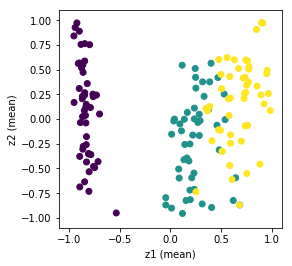

Optimized hyperparameters
Optimal mapsize: 30, 30
Optimal shape of RBF centers: 4, 4
Optimal variance of RBFs: 8.0
Optimal lambda in EM algorithm: 0.25


In [9]:
# plot the mean of responsibilities
means = responsibilities.dot( model.mapgrids )
plt.figure(figsize=figure.figaspect(1))
plt.scatter( means[:,0], means[:,1], c=color)
plt.ylim(-1.1,1.1)
plt.xlim(-1.1,1.1)
plt.xlabel("z1 (mean)")
plt.ylabel("z2 (mean)")
plt.show()

print("Optimized hyperparameters" )
print("Optimal mapsize: {0}, {1}".format(shapeofmap[0],shapeofmap[1]))
print("Optimal shape of RBF centers: {0}, {1}".format(shapeofrbfcenters[0],shapeofrbfcenters[1]))
print("Optimal variance of RBFs: {0}".format(varianceofrbfs))
print("Optimal lambda in EM algorithm: {0}".format(lambdainemalgorithm))